## Brain Stroke Dataset

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [114]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Brain_Stock/brain_stroke.csv")

In [55]:
data.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [166]:
data.describe

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_ty

In [168]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [170]:
data['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [172]:
data_df = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]

## Visualization 

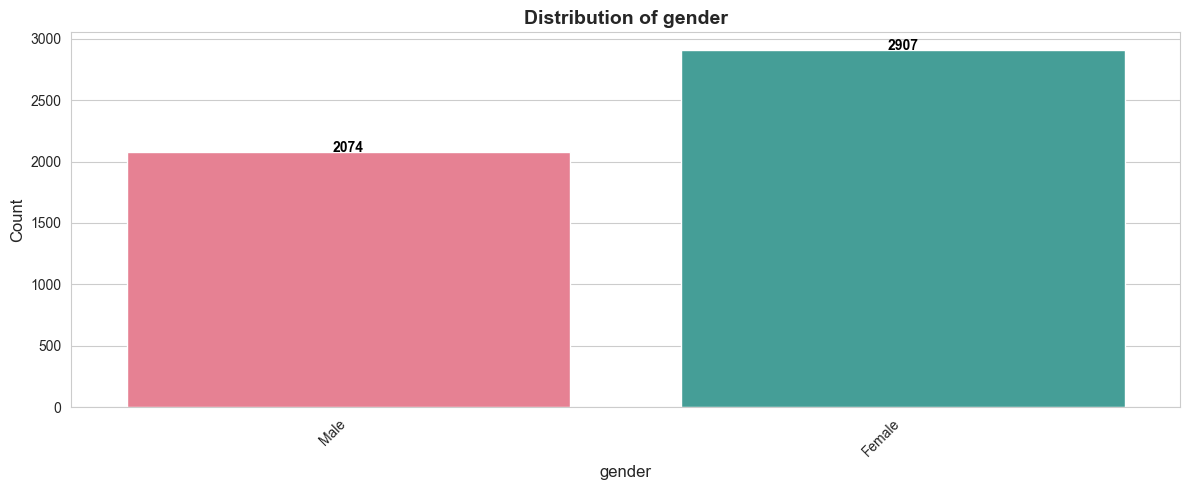

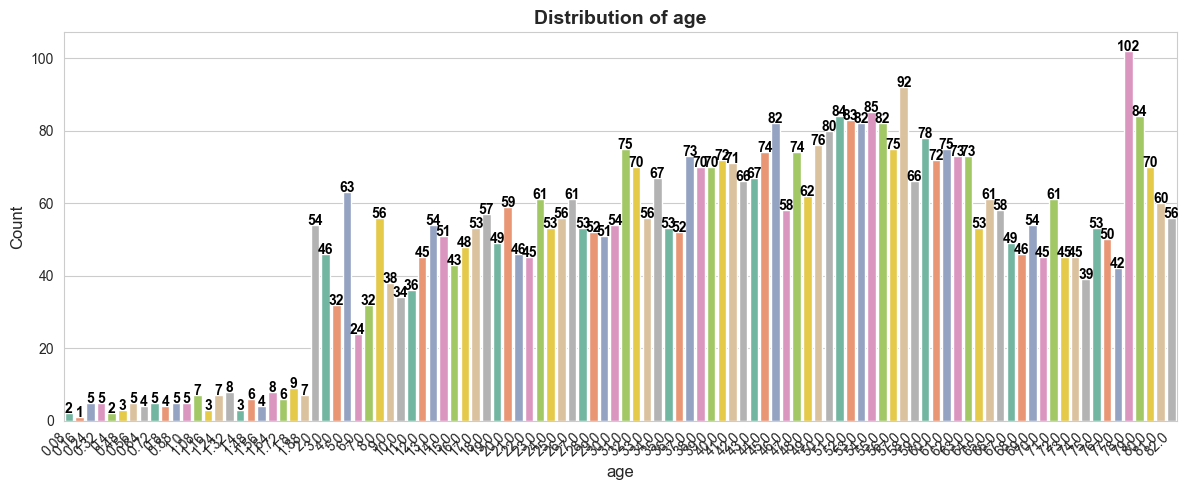

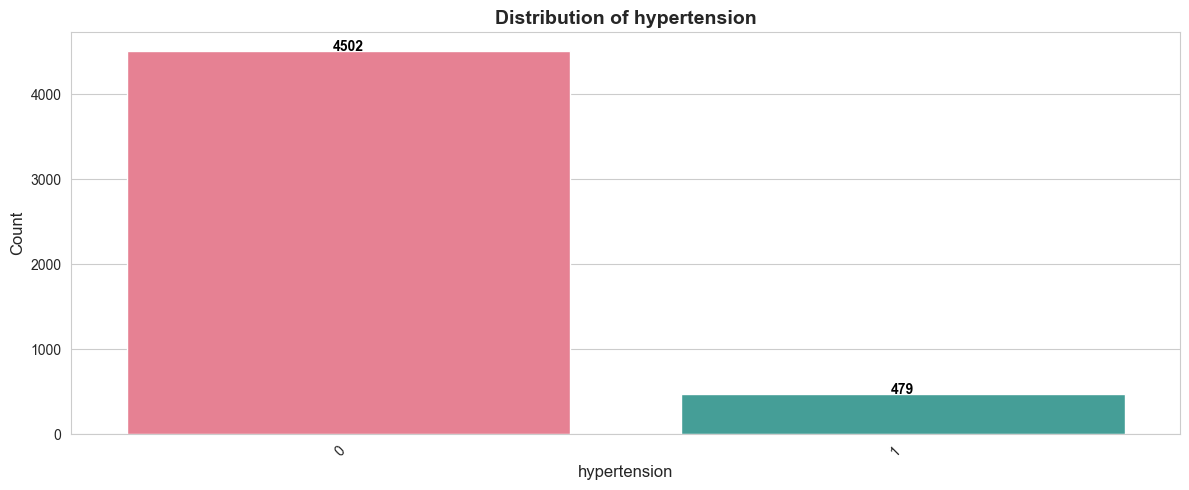

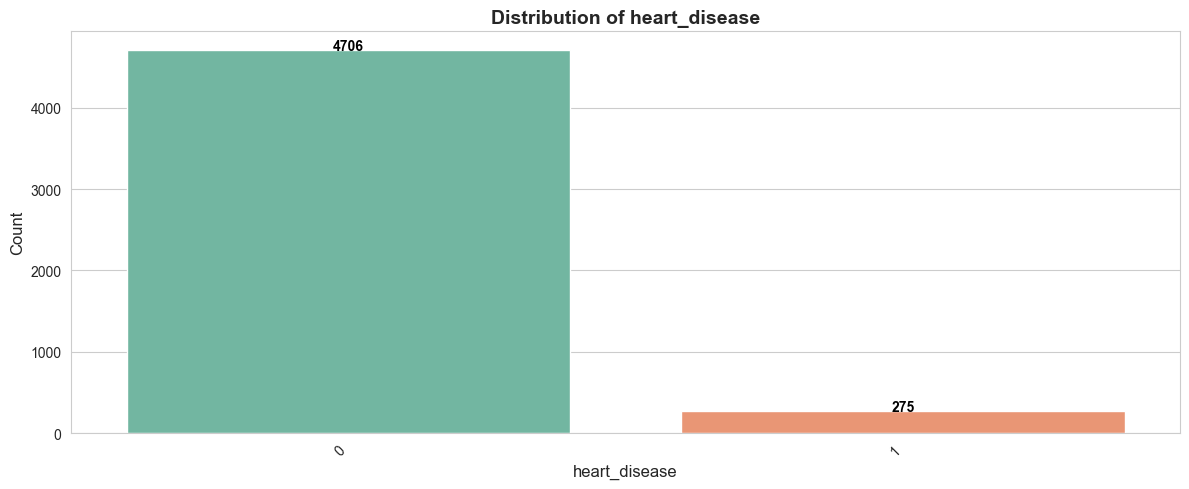

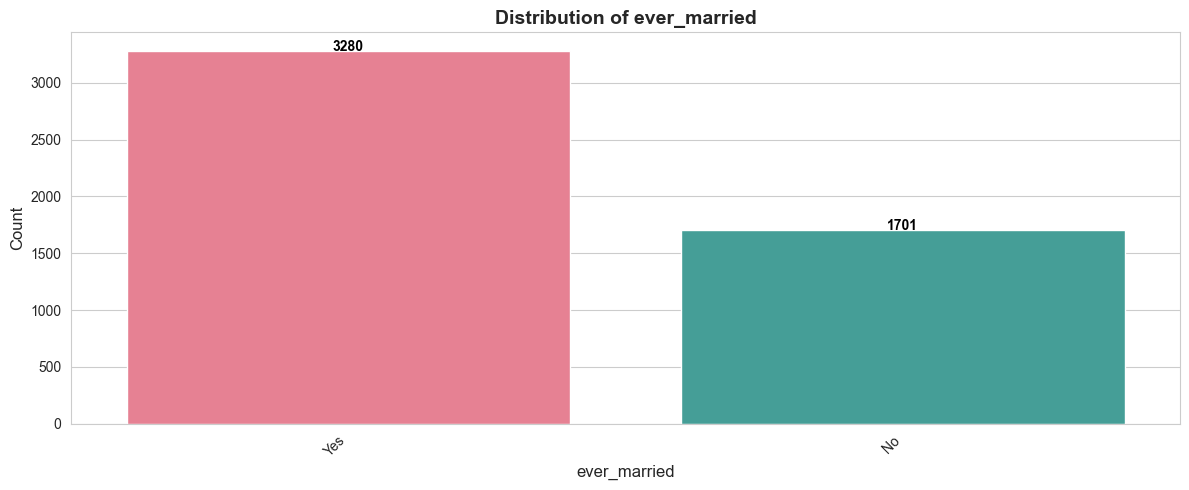

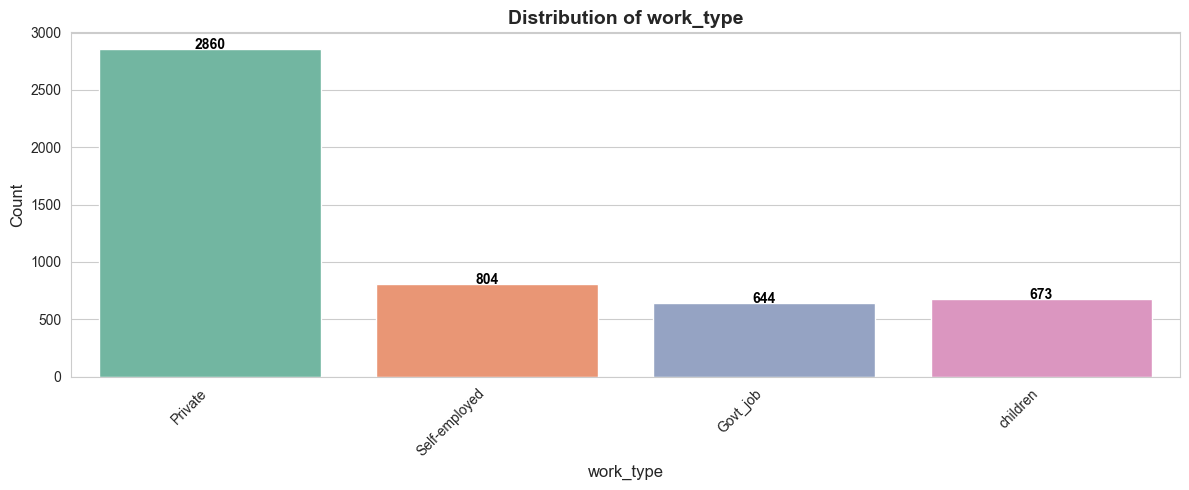

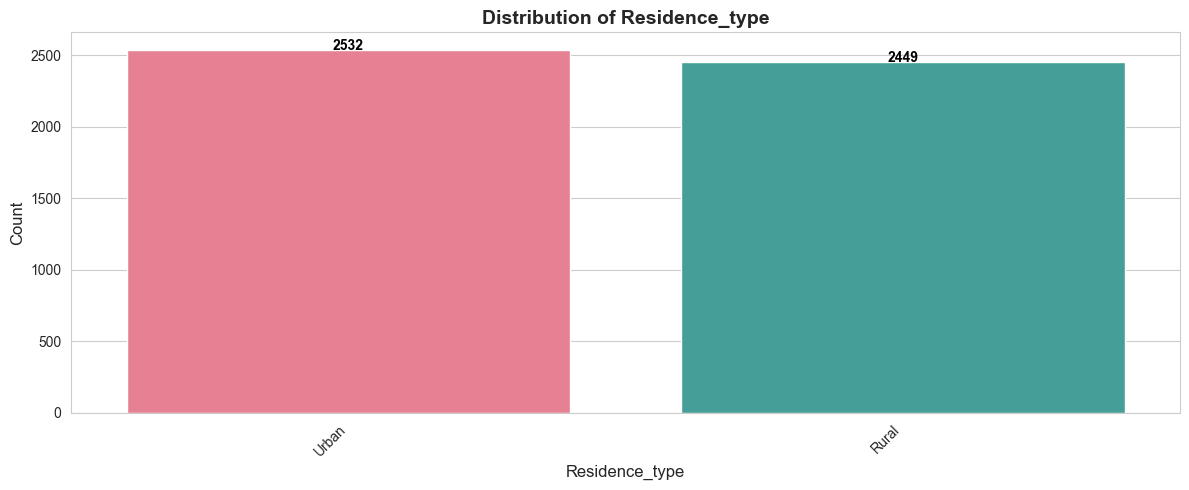

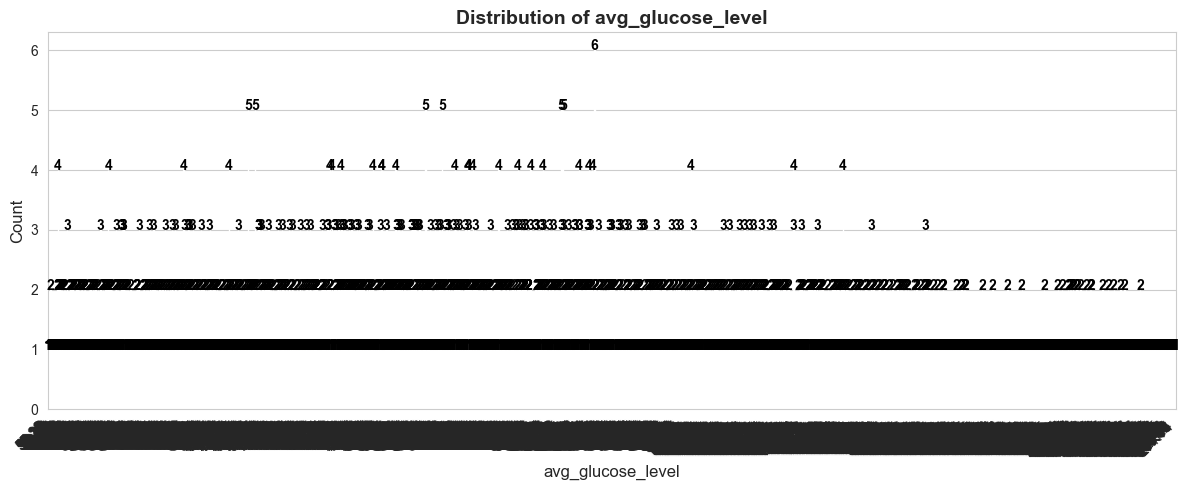

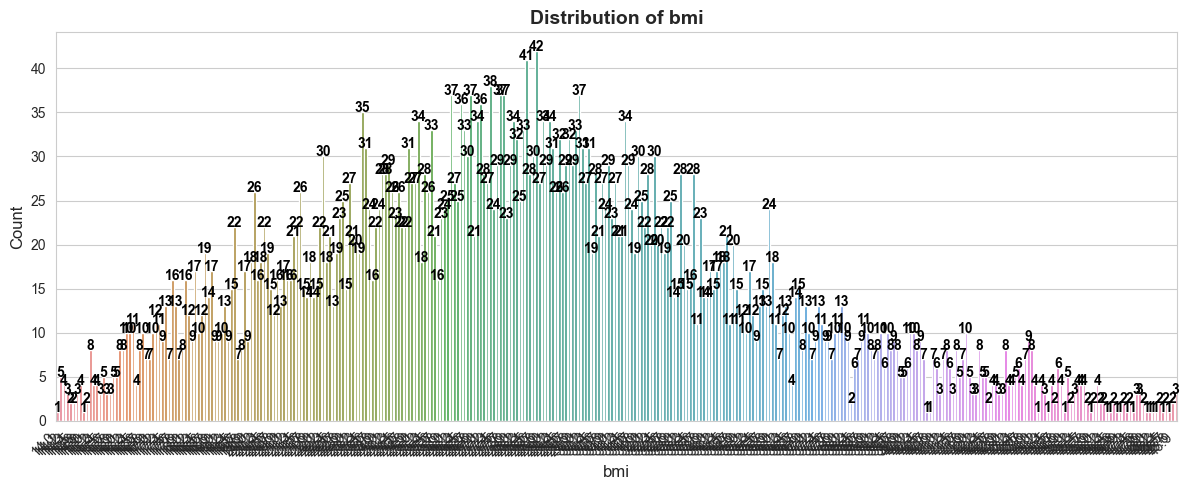

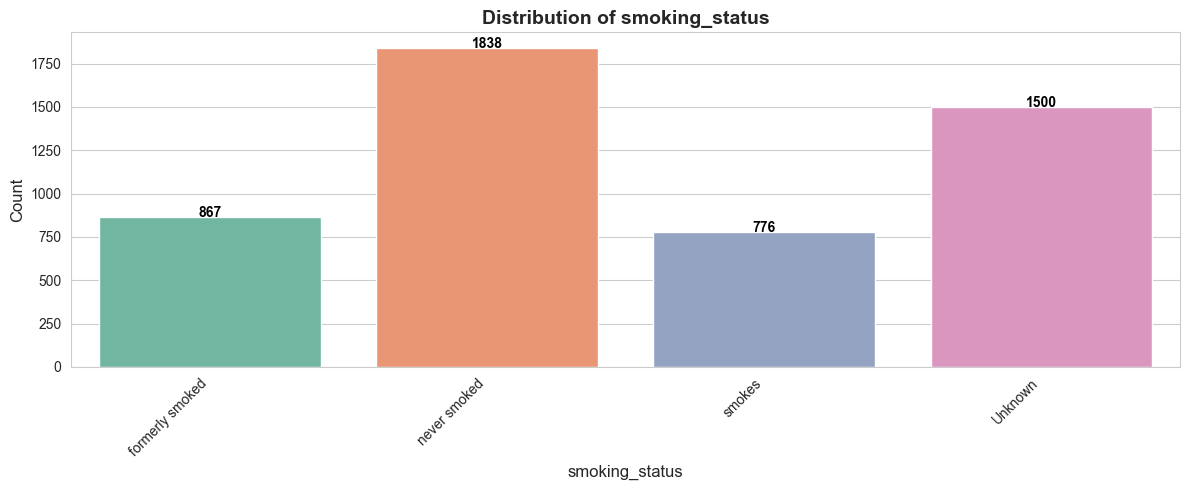

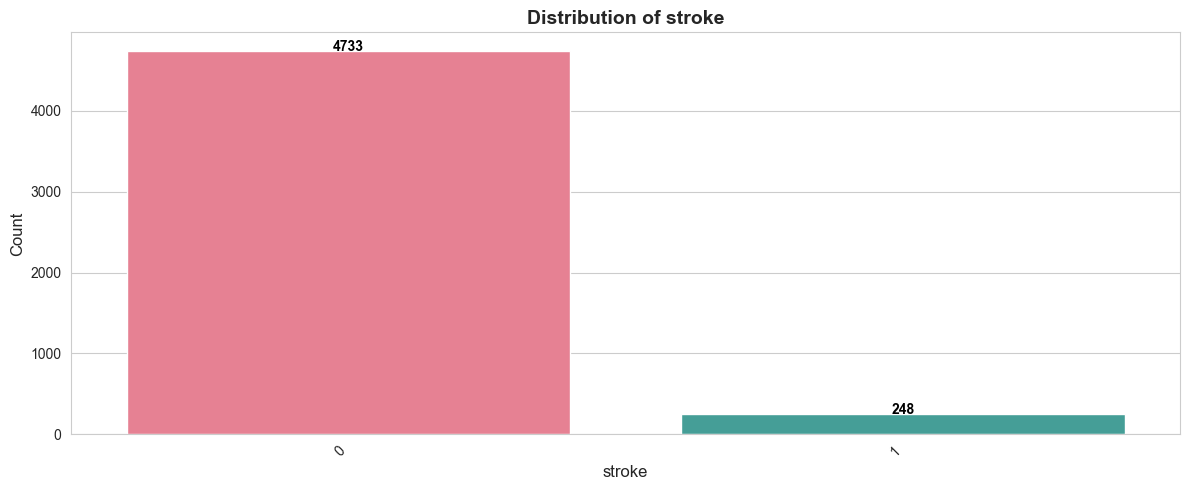

In [175]:
# Loop through each categorical column and plot its value counts
for i, column in enumerate(data_df.columns, start=1):
    plt.figure(figsize=(12, 5))
    
    # Custom palette with alternating colors for better visual distinction
    palette = sns.color_palette("Set2") if i % 2 == 0 else sns.color_palette("husl", len(data_df[column].unique()))
    
    # Create the count plot
    sns.countplot(data=data_df, x=column, palette=palette)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')

# Set custom title and labels
    plt.title(f"Distribution of {column}", fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Add count labels on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='baseline', 
                           fontsize=10, color='black', weight='bold')

# Display the plot
    plt.tight_layout()
    plt.show()




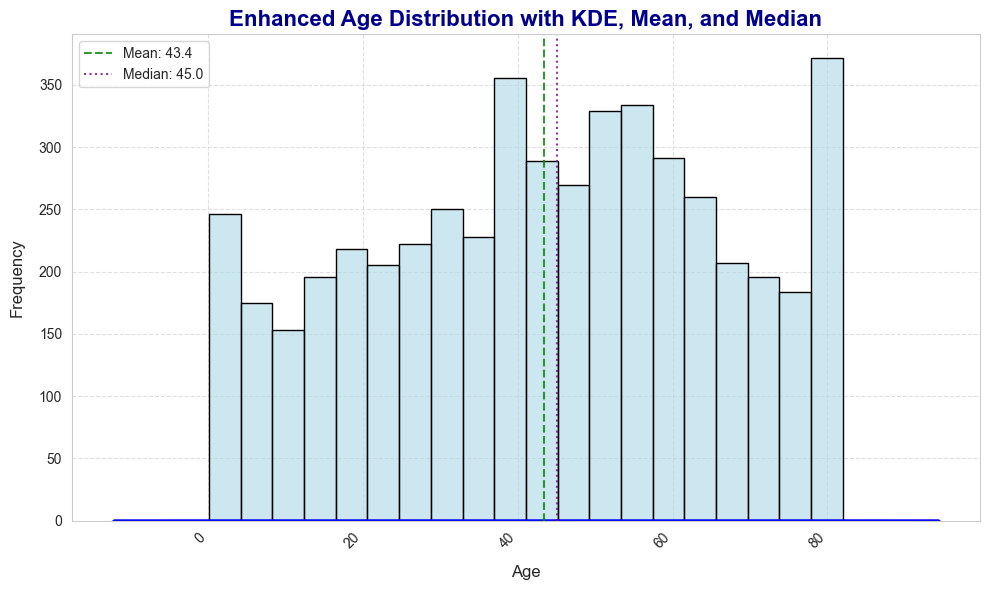

In [177]:
# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Define the color palette and set a gradient color for the KDE
color_gradient = sns.light_palette("blue", as_cmap=True)

# Plot histogram with outlined bars for a unique effect
sns.histplot(data_df['age'], kde=False, color="lightblue", edgecolor="black", alpha=0.6)

# Overlay KDE plot with a gradient fill
sns.kdeplot(data_df['age'], color="blue", fill=True, alpha=0.3, linewidth=2, cmap=color_gradient)

# Add mean and median lines for reference with transparent effect
mean_age = data_df['age'].mean()
median_age = data_df['age'].median()
plt.axvline(mean_age, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_age:.1f}', alpha=0.8)
plt.axvline(median_age, color='purple', linestyle=':', linewidth=1.5, label=f'Median: {median_age:.1f}', alpha=0.8)

# Title and labels with enhanced font size and weight
plt.title("Enhanced Age Distribution with KDE, Mean, and Median", fontsize=16, weight='bold', color="darkblue")
plt.xlabel("Age", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)

# Rotate x-ticks for readability and add a unique layout with gridlines
plt.xticks(rotation=45, ha="right")
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Display legend for mean and median
plt.legend()

# Show the plot with tight layout
plt.tight_layout()
plt.show()

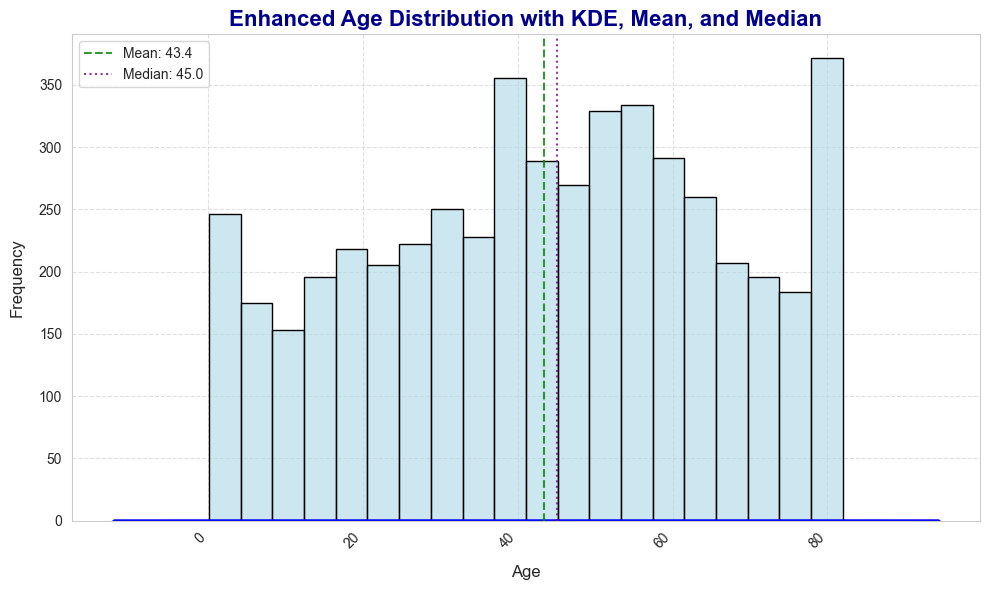

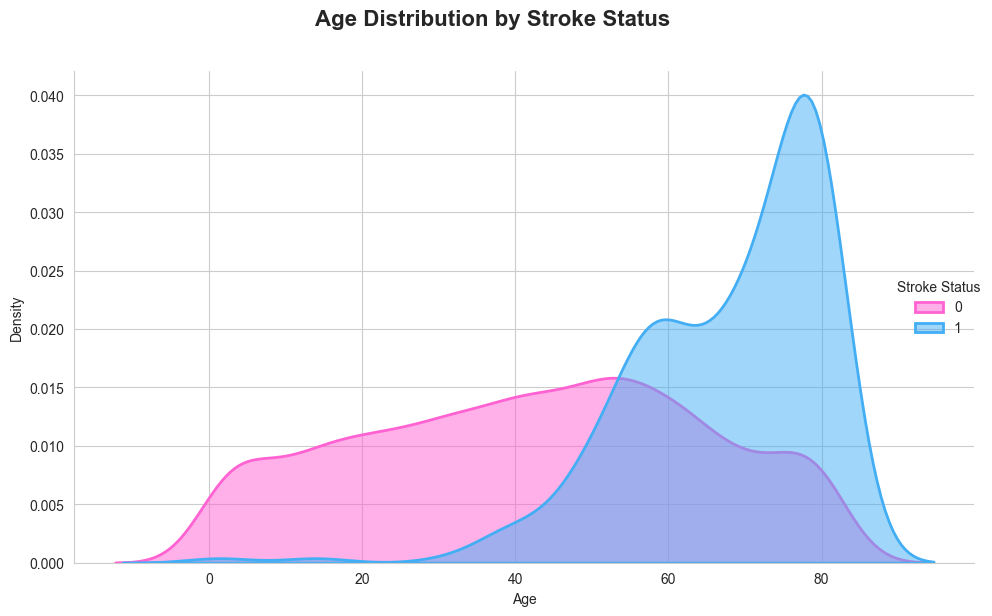

In [178]:
# Set up the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Define the color palette and set a gradient color for the KDE
color_gradient = sns.light_palette("blue", as_cmap=True)

# Plot histogram with outlined bars for a unique effect
sns.histplot(data_df['age'], kde=False, color="lightblue", edgecolor="black", alpha=0.6)

# Overlay KDE plot with a gradient fill
sns.kdeplot(data_df['age'], color="blue", fill=True, alpha=0.3, linewidth=2, cmap=color_gradient)

# Add mean and median lines for reference with transparent effect
mean_age = data_df['age'].mean()
median_age = data_df['age'].median()
plt.axvline(mean_age, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_age:.1f}', alpha=0.8)
plt.axvline(median_age, color='purple', linestyle=':', linewidth=1.5, label=f'Median: {median_age:.1f}', alpha=0.8)

# Title and labels with enhanced font size and weight
plt.title("Enhanced Age Distribution with KDE, Mean, and Median", fontsize=16, weight='bold', color="darkblue")
plt.xlabel("Age", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)

# Rotate x-ticks for readability and add a unique layout with gridlines
plt.xticks(rotation=45, ha="right")
plt.grid(visible=True, linestyle="--", alpha=0.6)

# Display legend for mean and median
plt.legend()

# Show the plot with tight layout
plt.tight_layout()
plt.show()

# Set up the color palette and style
my_palette = ["#FF62D2", "#43AEF4"]
sns.set_style("whitegrid")

# Create a FacetGrid with separate KDE plots for each stroke category
g = sns.FacetGrid(data_df, hue="stroke", palette=my_palette, height=6, aspect=1.5)
g.map(sns.kdeplot, "age", fill=True, alpha=0.5, linewidth=2)

# Customize each plot in the FacetGrid
g.add_legend(title="Stroke Status")
g.set_axis_labels("Age", "Density")
g.set_titles("Age Distribution for Stroke = {col_name}")
g.fig.suptitle("Age Distribution by Stroke Status", fontsize=16, weight='bold', y=1.02)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

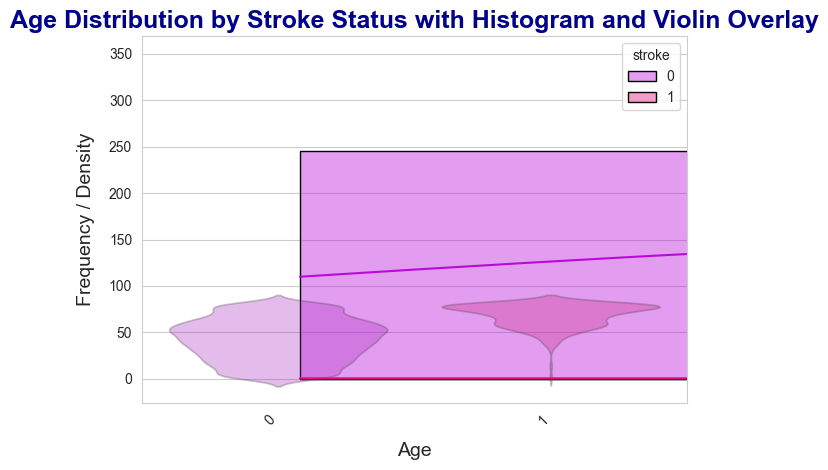

In [179]:
# Define a custom color palette
palette = ["#BA0ADA", "#E20C7E"]

# Create a histogram with KDE overlay for better distribution insight
sns.histplot(data=data_df, x="age", hue="stroke", bins=20, kde=True, palette=palette, edgecolor="black", alpha=0.4)

# Overlay a violin plot for a unique view of the density distribution per category
sns.violinplot(data=data_df, x="stroke", y="age", palette=palette, inner=None, alpha=0.3)

# Customize the plot for a unique look
plt.title("Age Distribution by Stroke Status with Histogram and Violin Overlay", fontsize=18, weight='bold', color="darkblue")
plt.xlabel("Age", fontsize=14, labelpad=10)
plt.ylabel("Frequency / Density", fontsize=14, labelpad=10)

# Rotate x-tick labels for clarity
plt.xticks(rotation=45, ha="right")

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

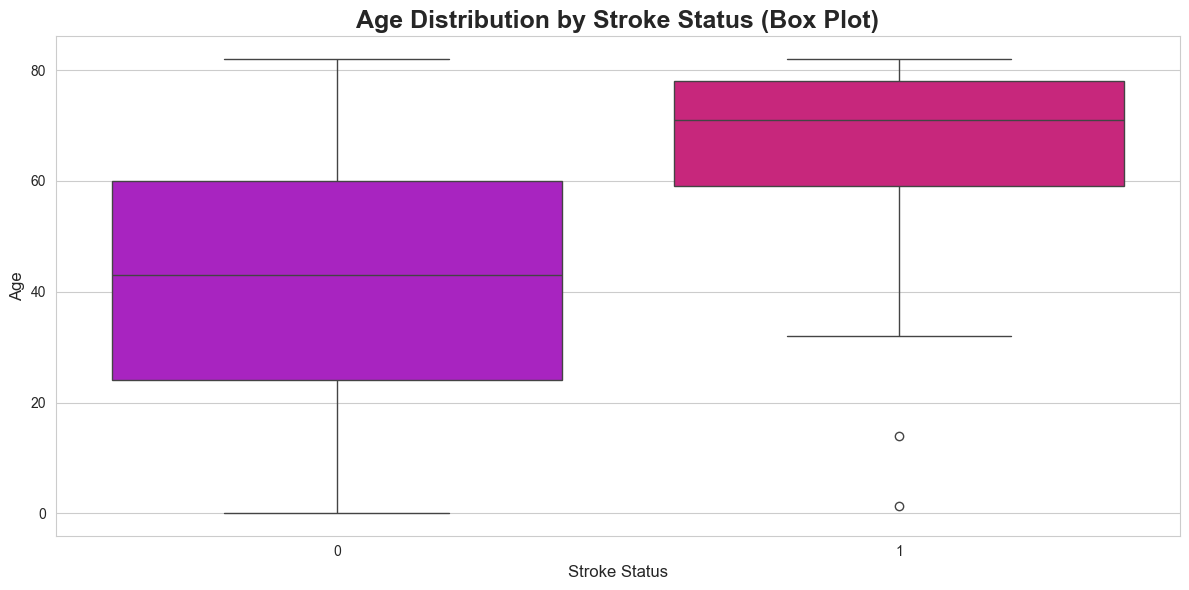

In [180]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Create a box plot with 'age' on the y-axis and 'stroke' on the x-axis
sns.boxplot(x="stroke", y="age", data=data_df, palette=["#BA0ADA", "#E20C7E"])

# Add title and labels for clarity
plt.title("Age Distribution by Stroke Status (Box Plot)", fontsize=18, weight='bold')
plt.xlabel("Stroke Status", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

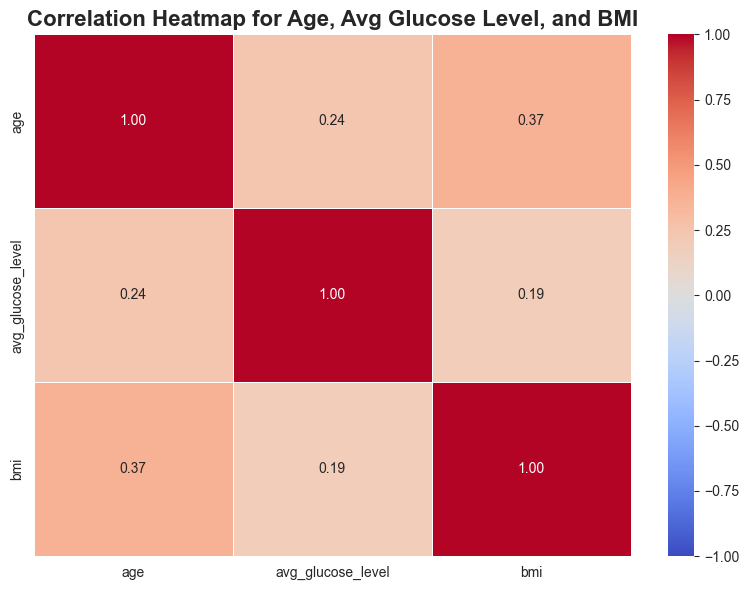

In [181]:
# Define the numerical data from the DataFrame (replace df_Stroke with your actual DataFrame name)
numerical_data = data_df[['age', 'avg_glucose_level', 'bmi']]

# Now calculate the correlation matrix
corr_matrix = numerical_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Heatmap for Age, Avg Glucose Level, and BMI", fontsize=16, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

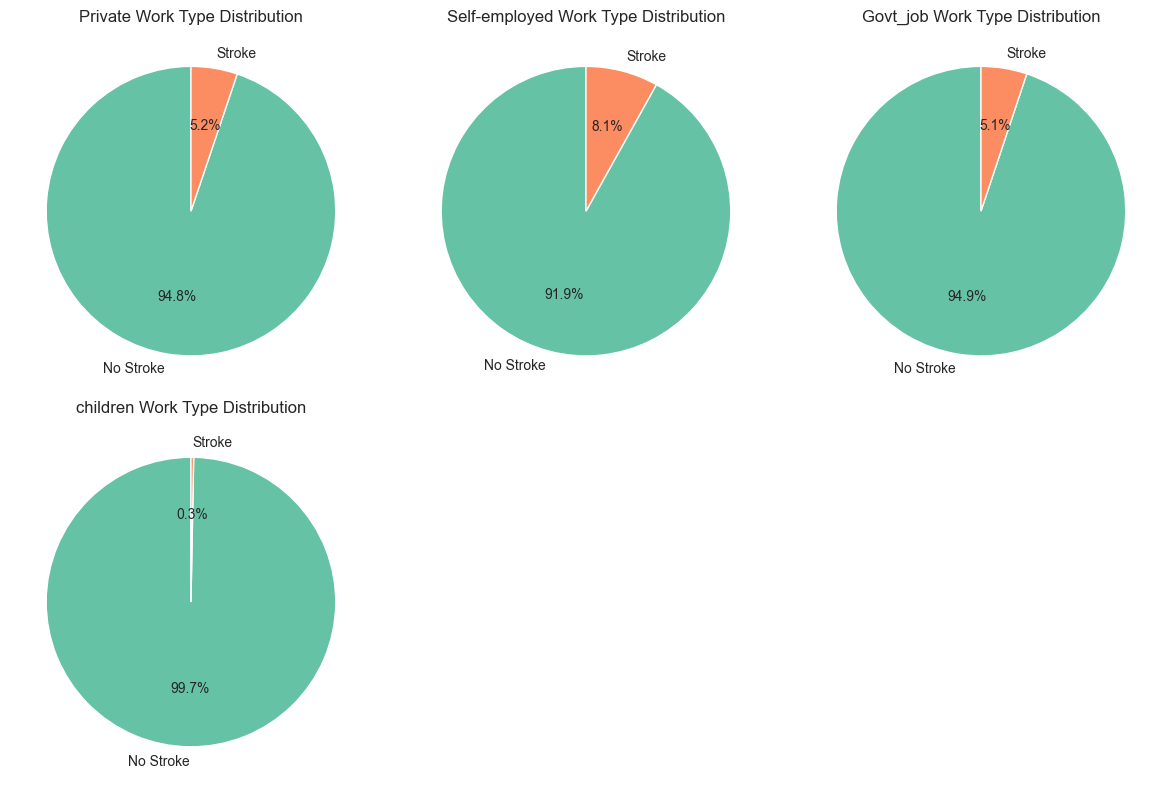

In [182]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Group by work_type and stroke, then plot pie charts for each work type
for i, work_type in enumerate(data_df['work_type'].unique()):
    plt.subplot(2, 3, i+1)  # Creates a grid for pie charts
    data = data_df[data_df['work_type'] == work_type]['stroke'].value_counts()
    plt.pie(data, labels=["No Stroke", "Stroke"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
    plt.title(f"{work_type} Work Type Distribution", fontsize=12)

# Display the plot with tight layout
plt.tight_layout()
plt.show()

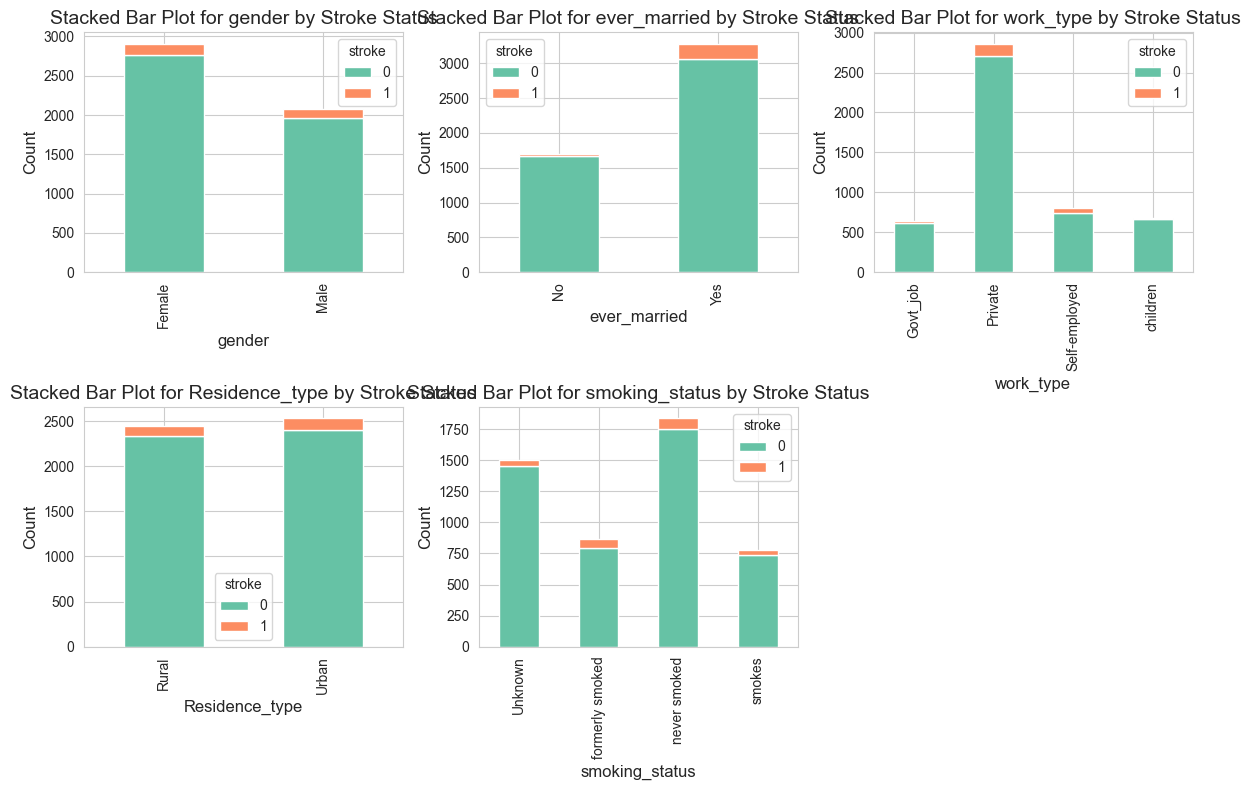

In [183]:
plt.figure(figsize=(12, 8))

# Loop through each categorical column and plot a stacked bar plot by stroke status
for i, col in enumerate(data_df.select_dtypes(include='object').columns, 1):
    plt.subplot(2, 3, i)
    # Calculate the counts for each category in the column by stroke status
    category_counts = data_df.groupby([col, 'stroke']).size().unstack().fillna(0)
    category_counts.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), ax=plt.gca())
    plt.title(f"Stacked Bar Plot for {col} by Stroke Status", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

## Feature Engineering

In [185]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling only to columns with more than 5 unique values
data_df[data_df.columns[data_df.nunique() > 5]] = scaler.fit_transform(data_df[data_df.columns[data_df.nunique() > 5]])

## Train And Test Modele 

In [187]:
X = data_df.drop("stroke",axis=1)
y =data_df['stroke']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)


## Logistic Regression

In [190]:
# Encode categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Apply encoding to all categorical columns (assumed here to be object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 94.58375125376128
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



## Decision Tree Classification

In [229]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 94.58375125376128
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.50      0.04      0.07        54

    accuracy                           0.95       997
   macro avg       0.72      0.52      0.52       997
weighted avg       0.92      0.95      0.92       997



## Random Forest Classification

In [232]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 94.28284854563691
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



## SVM classification

In [235]:
# Create and train the SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print('SVM Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

SVM Accuracy:  94.58375125376128
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



## Navie Bayes

In [238]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 86.05817452357071
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       943
           1       0.20      0.52      0.29        54

    accuracy                           0.86       997
   macro avg       0.58      0.70      0.60       997
weighted avg       0.93      0.86      0.89       997



## Bagging Ensemble

In [241]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the Bagging classifier
clf_bagging = BaggingClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the Bagging classifier on the training data
clf_bagging.fit(X_train, y_train)

# Make predictions using the Bagging classifier
y_pred = clf_bagging.predict(X_test)

# Print the accuracy of the Bagging classifier
print('The accuracy of the bagging classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the bagging classifier is: 94.48345035105315


## Boosting classifier

In [243]:
# Initialize the base classifier
deci_clf = RandomForestClassifier()

# Initialize the AdaBoost classifier
clf_boosting = AdaBoostClassifier(estimator=deci_clf, n_estimators=20, random_state=42)

# Fit the AdaBoost classifier on the training data
clf_boosting.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred = clf_boosting.predict(X_test)

# Print the accuracy of the AdaBoost classifier
print('The accuracy of the Boosting classifier is:', accuracy_score(y_test, y_pred) * 100)

The accuracy of the Boosting classifier is: 93.98194583751254


## Model Accuracy comparison

In [245]:

# Step 1: One-Hot Encode categorical columns (e.g., 'Gender')
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid dummy variable trap

# Step 2: Scale numeric features
# Use StandardScaler to standardize the numeric features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Define KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: List of classifiers and models
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]

# Step 5: Initialize lists to store results
cv_mean = []
accuracy = []
std = []

# Step 6: Loop through each model, perform cross-validation, and store results
for model in models:
    cv_result = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")
    cv_mean.append(cv_result.mean())  # Mean accuracy of cross-validation
    std.append(cv_result.std())  # Standard deviation of the cross-validation scores
    accuracy.append(cv_result)  # All accuracy scores

# Step 7: Create a DataFrame to summarize the results
results_df = pd.DataFrame({
    'CV Mean': cv_mean,
    'Std': std
}, index=classifiers)

# Display the results DataFrame
print(results_df)

                      CV Mean       Std
Linear SVM           0.950213  0.011689
Radial SVM           0.950213  0.011689
Logistic Regression  0.950213  0.011689
Decision Tree        0.905841  0.012303
Naive Bayes          0.820317  0.019514
Random Forest        0.948206  0.011992


In [205]:
# Updated CV Mean and Std values
cv_mean = [0.950213, 0.950213, 0.950213, 0.905639, 0.820317, 0.949009]  # CV Mean accuracies
std = [0.011689, 0.011689, 0.011689, 0.010527, 0.019514, 0.011422]  # Standard deviations
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Create the DataFrame
new_models_dataframe2 = pd.DataFrame({'CV Mean': cv_mean, 'Std': std}, index=classifiers)

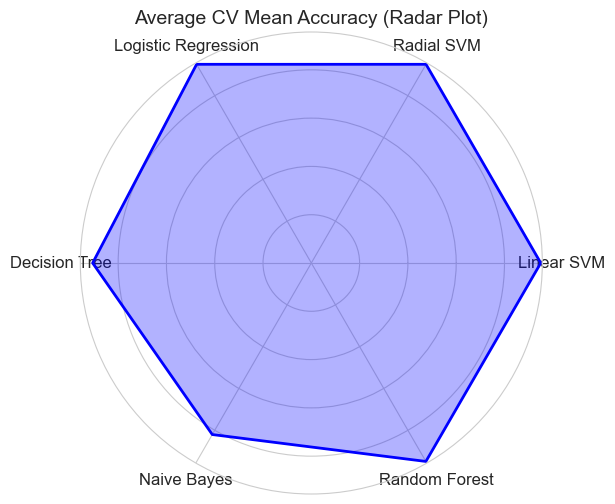

In [206]:
# Radar chart
categories = new_models_dataframe2.index
values = new_models_dataframe2['CV Mean'].tolist()

# Number of variables (classifiers)
N = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The plot is circular, so we need to "close" the circle
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)
ax.plot(angles, values, color='blue', linewidth=2)  # Outline the area

# Set the labels and title
ax.set_yticklabels([])  # Remove radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title('Average CV Mean Accuracy (Radar Plot)', fontsize=14)
plt.show()